<h1 style='color:purple' align= 'center'>Movie Rating Prediction </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Train/Train.csv")

In [3]:
df.shape

(40000, 2)

In [4]:
df.head(10)

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos
5,Steve Carell comes into his own in his first s...,pos
6,I'm only going to write more because it's requ...,neg
7,"OK, it was a ""risky"" move to rent this flick, ...",neg
8,"Cannibalism, a pair of cinematic references to...",pos
9,This is one of the great modern kung fu films....,pos


In [5]:
df['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
y = df['label'].values

In [8]:
y = le.fit_transform(y)

In [9]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [10]:
df['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

### Data Preprocessing

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
# import nltk
# nltk.download('stopwords')

In [13]:
sw = set(stopwords.words('english'))
ps = PorterStemmer()


In [14]:
ps.stem("jumping")        # It reduces the size of the vocabulary
ps.stem("jumped")

'jump'

In [15]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", " ")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = [ps.stem(s) for s in sample if s not in sw] 
    # List Comprehension -> Doing this it will remove all the stopwords from sample
    
    sample = " ".join(sample)
    
    return sample

In [16]:
clean_text(df['review'][11])

'robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com'

In [17]:
df['review'][11]

'Robert Jordan is a television star. Robert Jordan likes things orderly, on time and properly executed. In his world children are to be seen, not heard. So why would Mr. Jordan want to become the master of a rambunctious band of Boy Scouts? Ratings. His staff figures that if learns how to interact with the youth, they will be more inclined to watch his show. Of course watching Jordan cope comprises most of the fun.<br /><br />Like Mr. Belvedere and Mr. Belvedere Goes to College this one is sure to please.<br /><br />ANYONE INTERESTED IN OBTAINING A COPY OF THIS FILM PLEASE WRITE TO ME AT: IAMASEAL2@YAHOO.COM'

In [18]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [19]:
corpus = df['cleaned_review'].values

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [21]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [22]:
x = cv.fit_transform(corpus)

In [136]:
type(x)

scipy.sparse.csr.csr_matrix

In [23]:
print(x[0])

  (0, 27267)	1
  (0, 21567)	1
  (0, 19741)	1
  (0, 7321)	1
  (0, 27819)	1
  (0, 7656)	1
  (0, 48184)	2
  (0, 42219)	2
  (0, 32902)	1
  (0, 25857)	1
  (0, 45038)	1
  (0, 39927)	1
  (0, 38733)	1
  (0, 26415)	1
  (0, 43162)	1


In [24]:
tfidf = TfidfTransformer()        # It is more advanced version of Countvectorizer

In [25]:
X = tfidf.fit_transform(x)      # Our final matrix is this X which is converted into numbers

In [26]:
X.shape

(40000, 50000)

In [27]:
print(X[0])

  (0, 48184)	0.6819752655015812
  (0, 45038)	0.25119255525041106
  (0, 43162)	0.0965864286905228
  (0, 42219)	0.3750270455345158
  (0, 39927)	0.13849252597011114
  (0, 38733)	0.07330709769316791
  (0, 32902)	0.10542085612756652
  (0, 27819)	0.21881474575489854
  (0, 27267)	0.2120979220739086
  (0, 26415)	0.20078873734003677
  (0, 25857)	0.09054334968862854
  (0, 21567)	0.1655109840179868
  (0, 19741)	0.15429547416707126
  (0, 7656)	0.22943720942655785
  (0, 7321)	0.20235636422175907


In [28]:
type(X)

scipy.sparse.csr.csr_matrix

In [29]:
y.shape

(40000,)

### Create our Neural Network

In [175]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [176]:
print(tf.__version__)

2.2.0


In [76]:
model = Sequential()

In [77]:
model.add(Dense(16, activation='relu', input_shape = (X.shape[1],) ) )
model.add(Dense(16, activation='relu' ) )
model.add(Dense(1, activation='sigmoid') ) 

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy']) 

In [80]:
X_val = X[:5000]       # from 0 to 5000
X_train = X[5000:]     # from 5000 to 40000

y_val = y[:5000]
y_train = y[5000:]

In [81]:
X_val.sort_indices()
X_train.sort_indices()

In [82]:
X_train.shape, y_train.shape

((35000, 50000), (35000,))

In [83]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val),shuffle=True,verbose=2 )

Epoch 1/5
274/274 - 5s - loss: 0.4442 - accuracy: 0.8567 - val_loss: 0.2787 - val_accuracy: 0.8884
Epoch 2/5
274/274 - 5s - loss: 0.2114 - accuracy: 0.9179 - val_loss: 0.2474 - val_accuracy: 0.8970
Epoch 3/5
274/274 - 5s - loss: 0.1667 - accuracy: 0.9369 - val_loss: 0.2582 - val_accuracy: 0.8942
Epoch 4/5
274/274 - 4s - loss: 0.1424 - accuracy: 0.9472 - val_loss: 0.2742 - val_accuracy: 0.8930
Epoch 5/5
274/274 - 4s - loss: 0.1251 - accuracy: 0.9538 - val_loss: 0.2921 - val_accuracy: 0.8912


In [84]:
result = hist.history

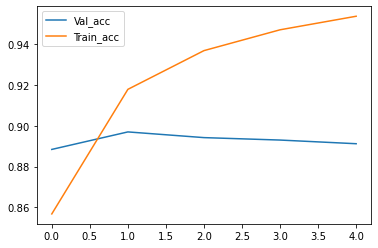

In [85]:
plt.plot(result['val_accuracy'], label='Val_acc')
plt.plot(result['accuracy'], label='Train_acc')
plt.legend()
plt.show()

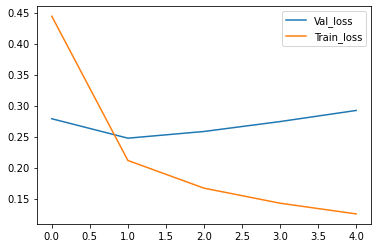

In [86]:
plt.plot(result['val_loss'], label='Val_loss')
plt.plot(result['loss'], label='Train_loss')
plt.legend()
plt.show()

In [87]:
model.evaluate(X_val, y_val)        # accuracy -> 0.890999972820282

157/157 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8912


[0.29209569096565247, 0.8912000060081482]

# Test Time

In [88]:
test = pd.read_csv("./Test/Test.csv")

In [89]:
test.shape

(10000, 1)

In [90]:
test.head()

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [91]:
test['cleaned_review'] = test['review'].apply(clean_text)

In [118]:
X_test = test['cleaned_review']

In [119]:
# We will do just cv.transform() because we do not want our model to learn new words
# It might happen that it will get a word which is not used while training but then in that case we have to ignore that word

X_test = cv.transform(X_test)     # It will create a sparse matrix like it did in training part


In [120]:
X_test.shape

(10000, 50000)

In [121]:
X_test = tfidf.transform(X_test)

In [ ]:
# Converting X_test (scipy sparse matrix) to final_X (sparse Tensor)

In [122]:
# First you convert the matrix to COO format. Then you extract the indices, values, and shape
# and pass those directly to the SparseTensor constructor

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

sparse_tensor_X = convert_sparse_matrix_to_sparse_tensor(X_test)

final_X = tf.sparse.reorder(sparse_tensor_X)

### Making Predictions 

In [144]:
y_pred = model.predict(final_X)

In [145]:
y_pred

array([[0.04427117],
       [0.00452253],
       [0.00156626],
       ...,
       [0.99890447],
       [0.99862635],
       [0.00686175]], dtype=float32)

In [151]:
s = clean_text("The movie was awesome")
s = [s]
vect = cv.transform(s).toarray()
rev = tfidf.transform(vect)

rev_sparse_tensor = convert_sparse_matrix_to_sparse_tensor(rev)
final_review = tf.sparse.reorder(rev_sparse_tensor)

In [159]:
prediction = model.predict(final_review)
prediction

array([[0.98354924]], dtype=float32)

In [160]:
prediction.item(0)

0.9835492372512817

In [163]:
y_pred[y_pred >= 0.5] = 1

In [164]:
y_pred = y_pred.astype('int')

In [165]:
y_pred[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [166]:
dict = {0 : 'neg', 1 : 'pos'}

y_pred = [ dict[p[0]] for p in y_pred ]

In [167]:
y_pred

['neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',


In [168]:
# Generate ids
ids = np.arange(10000)

In [169]:
final_matrix = np.stack((ids, y_pred), axis = 1)

In [170]:
df = pd.DataFrame(final_matrix, columns=['Id', 'label'] )

In [171]:
df

,Id,label
0,0,neg
1,1,neg
2,2,neg
3,3,pos
4,4,pos
...,...,...
9995,9995,neg
9996,9996,pos
9997,9997,pos
9998,9998,pos


### Create a csv file of predicted values

In [172]:
df.to_csv("y_pred.csv", index = False)      # We do not want index column to appear in the final data

In [174]:
# import pickle
# with open('Movie_Rating_Prediction_model.pickle','wb') as f:
#    pickle.dump(model,f)

### Saving the model 

In [177]:
# Saving model using keras
model.save("my_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets


In [178]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
# Let's check

In [179]:
reconstructed_model.predict(final_review)

array([[0.98354924]], dtype=float32)

In [180]:
pickle.dump(cv, open('cv-transform.pkl', 'wb'))

In [181]:
pickle.dump(tfidf, open('tfidf-transform.pkl', 'wb'))